In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
from plotly import __version__
import cufflinks as cf
from plotly.offline import download_plotlyjs,init_notebook_mode,plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()
import warnings
warnings.filterwarnings('ignore')
data = pd.read_csv("C:\\Users\\Myesha\\Desktop\\SampleSuperstore.csv")

In [2]:
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [3]:
data.duplicated().sum()

17

In [4]:
data.drop_duplicates(keep="first",inplace=True)
data.shape

(9977, 13)

In [13]:
code = ['Postal Code']
data1 = data.drop(columns=code,axis=1)
print('Mean and Standard Deviation of Data')
data1.describe()


Mean and Standard Deviation of Data


,Sales,Quantity,Discount,Profit
count,9977.000000,9977.000000,9977.000000,9977.00000
mean,230.148902,3.790719,0.156278,28.69013
std,623.721409,2.226657,0.206455,234.45784
min,0.444000,1.000000,0.000000,-6599.97800
25%,17.300000,2.000000,0.000000,1.72620
50%,54.816000,3.000000,0.200000,8.67100
75%,209.970000,5.000000,0.200000,29.37200
max,22638.480000,14.000000,0.800000,8399.97600


In [14]:
print('Correlation')
correlation = data1.corr()
correlation

Correlation


,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200722,-0.028311,0.479067
Quantity,0.200722,1.000000,0.008678,0.066211
Discount,-0.028311,0.008678,1.000000,-0.219662
Profit,0.479067,0.066211,-0.219662,1.000000


In [15]:
print('Covariance')
Covariance = data1.cov()
Covariance

Covariance


,Sales,Quantity,Discount,Profit
Sales,389028.396022,278.765576,-3.645637,70057.067126
Quantity,278.765576,4.958001,0.003990,34.565743
Discount,-3.645637,0.003990,0.042624,-10.632751
Profit,70057.067126,34.565743,-10.632751,54970.478824


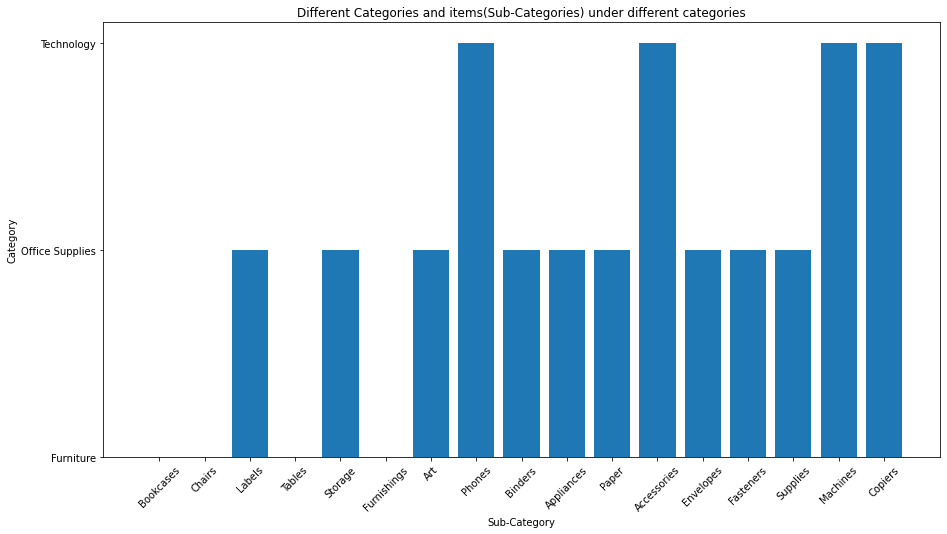

In [16]:
#Different Categories and items(sub-category) under different categories
plt.figure(figsize=(15,8))
plt.bar('Sub-Category', 'Category', data=data1)
plt.title('Different Categories and items(Sub-Categories) under different categories')
plt.xlabel('Sub-Category')
plt.ylabel('Category')
plt.xticks(rotation=45)
plt.show()

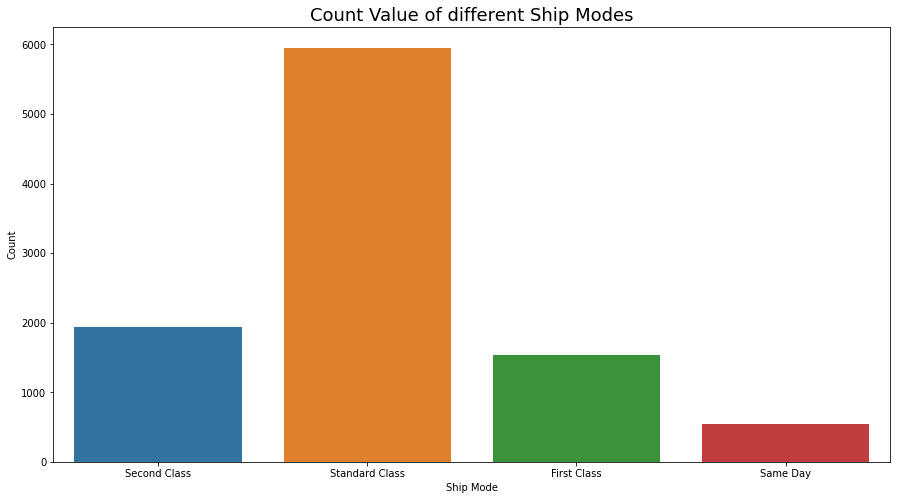

In [17]:
plt.figure(figsize=(15,8))
sns.countplot(x=data1['Ship Mode'])
plt.title('Count Value of different Ship Modes', fontsize=18)
plt.xlabel('Ship Mode', fontsize=10)

plt.ylabel('Count', fontsize=10)
plt.show()

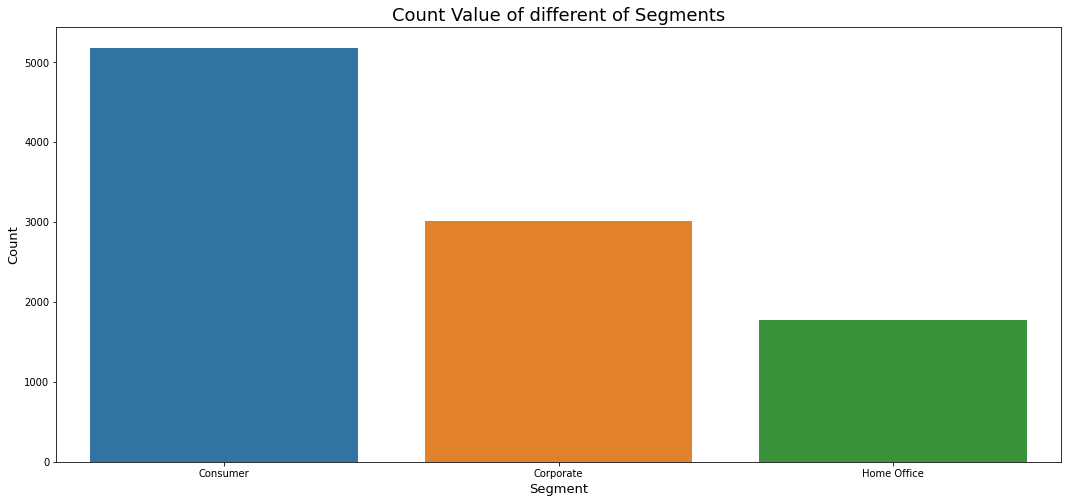

In [19]:
plt.figure(figsize=(18,8))
sns.countplot(x=data['Segment'])
plt.title('Count Value of different of Segments', fontsize=18)
plt.xlabel('Segment', fontsize=13)
plt.ylabel('Count', fontsize=13)
plt.show()

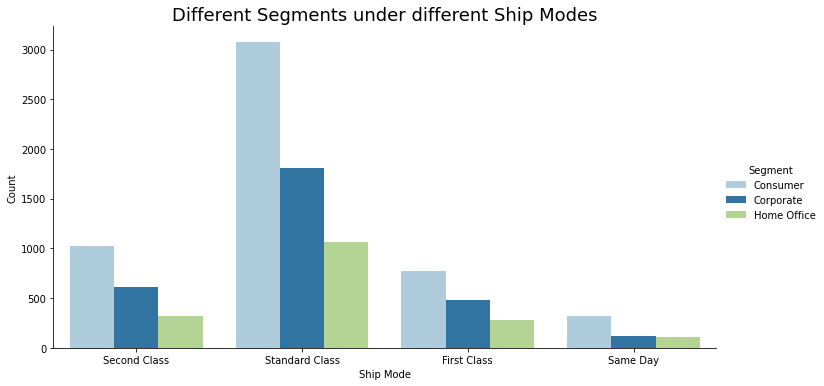

In [20]:
sns.catplot("Ship Mode", hue="Segment", data=data1, kind="count", aspect=2, palette="Paired")
plt.title('Different Segments under different Ship Modes', fontsize=18)
plt.xlabel('Ship Mode', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.show()

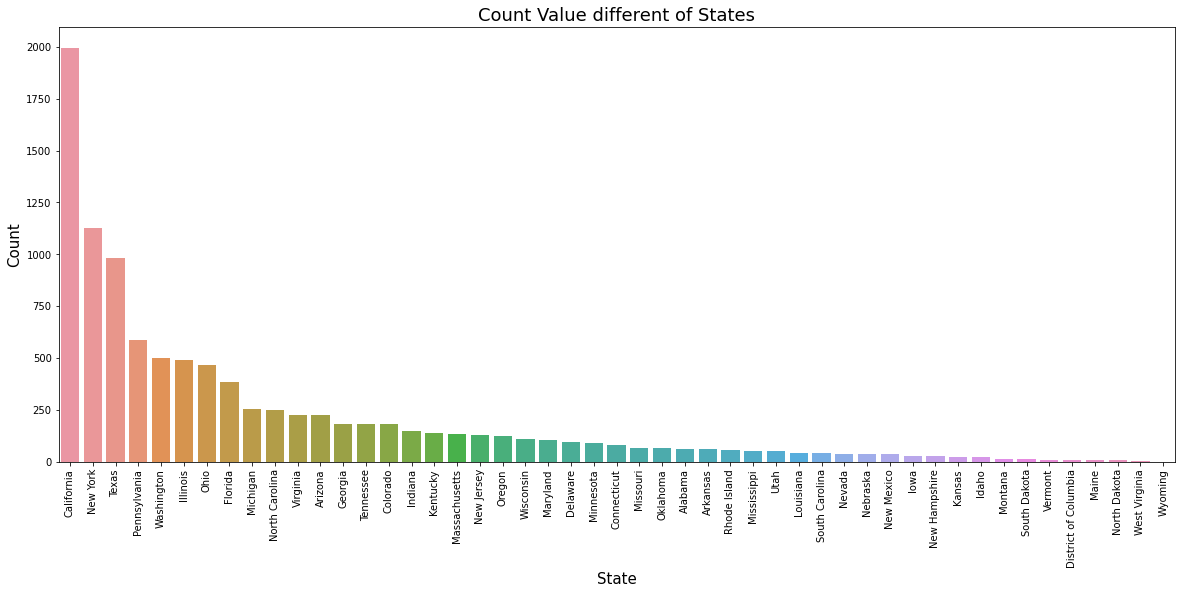

In [26]:
plt.figure(figsize=(20,8))
sns.countplot(x=data['State'], order=data['State'].value_counts().index)
plt.title('Count Value different of States', fontsize=18)
plt.xlabel('State', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xticks(rotation=90)
plt.show()

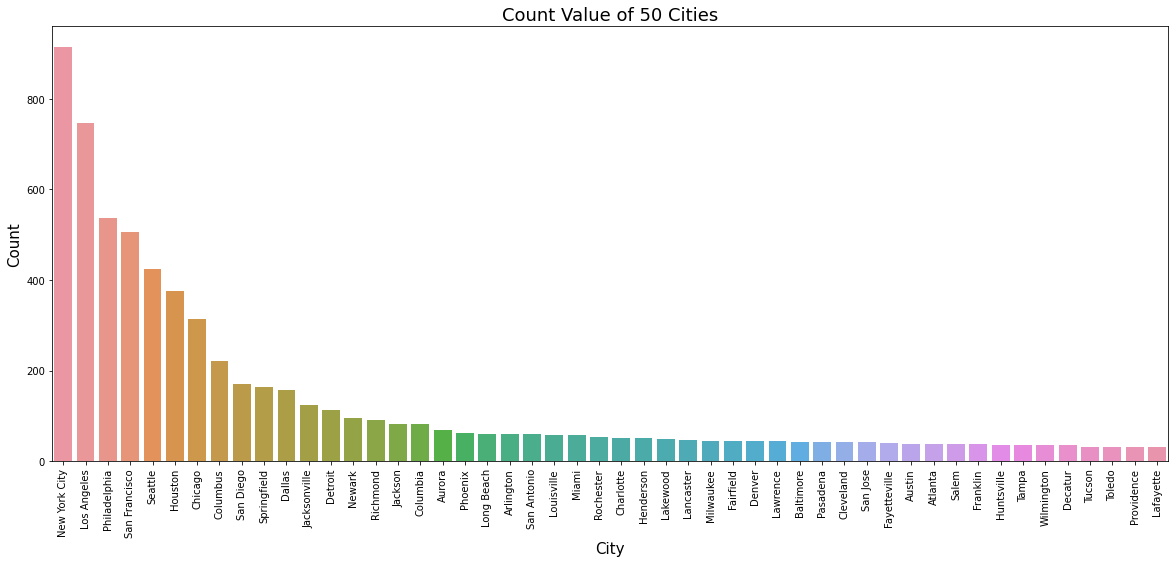

In [27]:
plt.figure(figsize=(20,8))
sns.countplot(x=data['City'], order=(data['City'].value_counts().head(50)).index)
plt.title('Count Value of 50 Cities', fontsize=18)
plt.xlabel('City', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xticks(rotation=90)
plt.show()

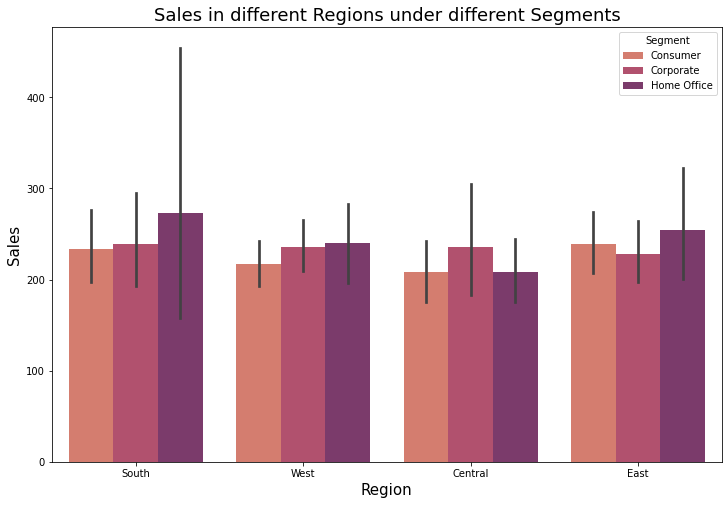

In [28]:
plt.figure(figsize=[12,8])
ax = sns.barplot(x="Region", y="Sales", hue="Segment", data=data1, palette="flare")
plt.title('Sales in different Regions under different Segments', fontsize=18)
plt.xlabel('Region', fontsize=15)
plt.ylabel('Sales', fontsize=15)
plt.show()

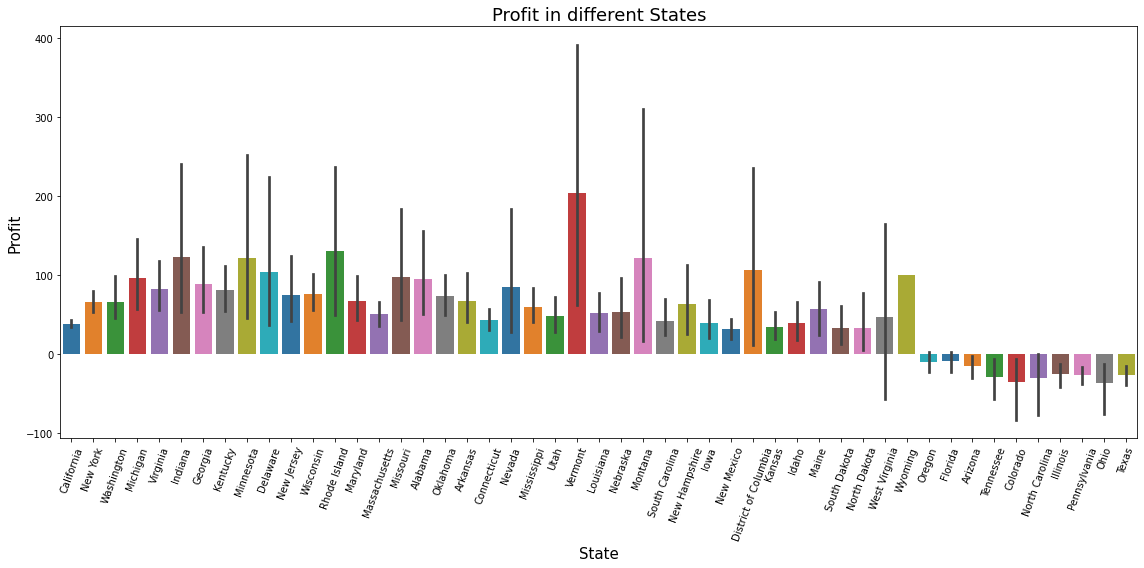

In [34]:
plt.figure(figsize=[16,8])
plot_order = data1.groupby('State')['Profit'].sum().sort_values(ascending=False).index.values
pl = sns.barplot(x="State", y="Profit", data=data1, palette="tab10", order=plot_order)
plt.title('Profit in different States', fontsize=18)
plt.xlabel('State', fontsize=15)
plt.ylabel('Profit', fontsize=15)
plt.xticks(rotation=70, fontsize=10)
plt.tight_layout()
plt.show()

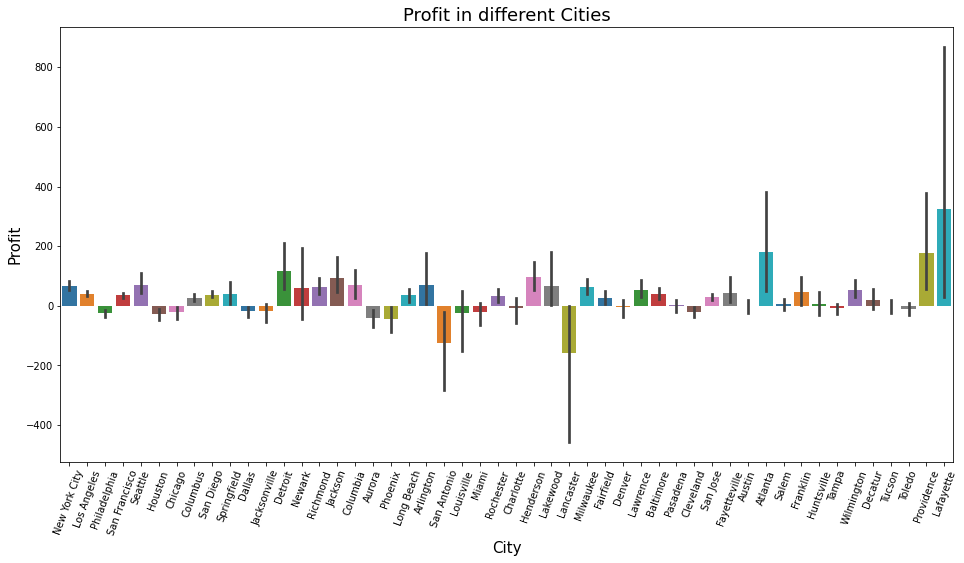

In [52]:
plt.figure(figsize=[16,8])

pl = sns.barplot(x="City", y="Profit", data=data1, palette="tab10", order=(data['City'].value_counts().head(50)).index)
plt.title('Profit in different Cities', fontsize=18)
plt.xlabel('City', fontsize=15)
plt.ylabel('Profit', fontsize=15)
plt.xticks(rotation=70, fontsize=10)

plt.show()

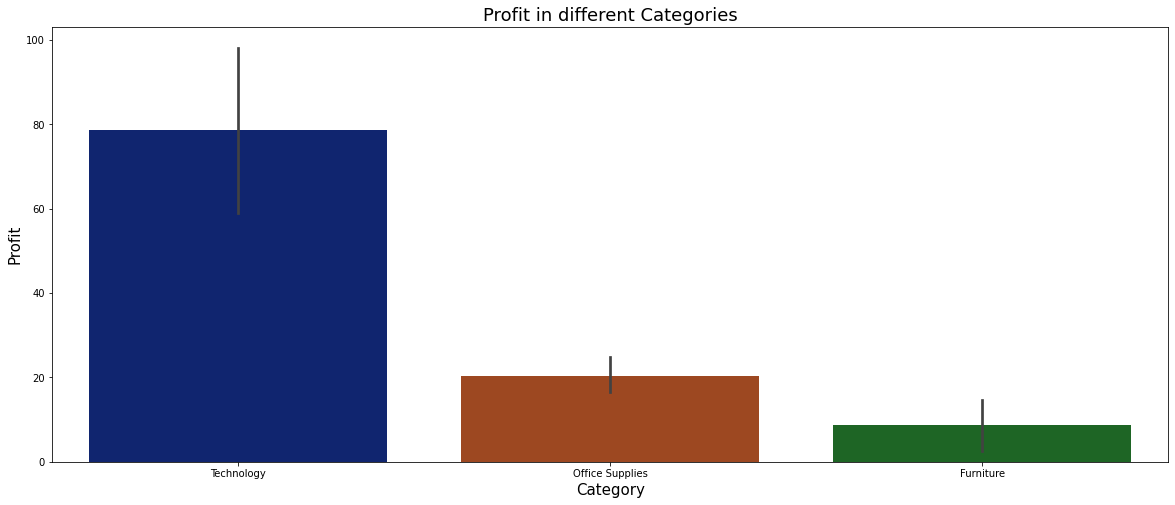

In [46]:
plt.figure(figsize=[20,8])
plot_order1 = data1.groupby('Category')['Profit'].sum().sort_values(ascending=False).index.values
lt = sns.barplot(x="Category", y="Profit", data=data1, palette="dark", order=plot_order1)
plt.title('Profit in different Categories', fontsize=18)
plt.xlabel('Category', fontsize=15)
plt.ylabel('Profit', fontsize=15)
plt.show()

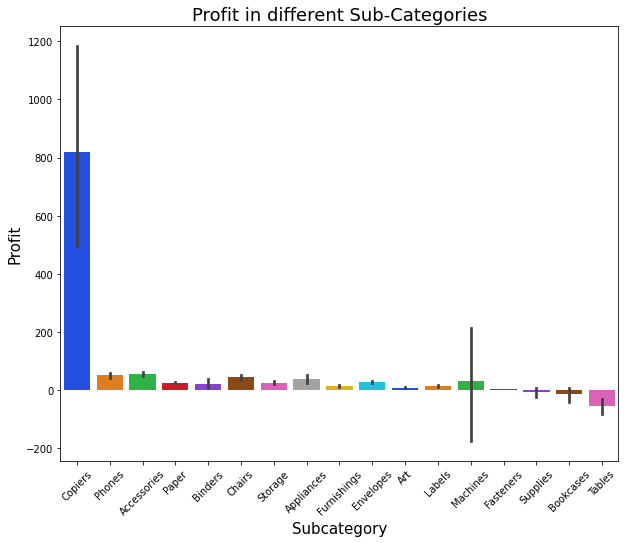

In [53]:
plt.figure(figsize=[10,8])
plot_order4 = data1.groupby('Sub-Category')['Profit'].sum().sort_values(ascending=False).index.values
ax = sns.barplot(x="Sub-Category", y="Profit", data=data1, palette="bright", order=plot_order4)
plt.title('Profit in different Sub-Categories', fontsize=18)
plt.xlabel("Subcategory", fontsize=15)
plt.ylabel("Profit",fontsize=15)
plt.xticks(rotation=45)
plt.show()

As in Category, the highest profit is in technology, so we will analyze all sub categories of Technology


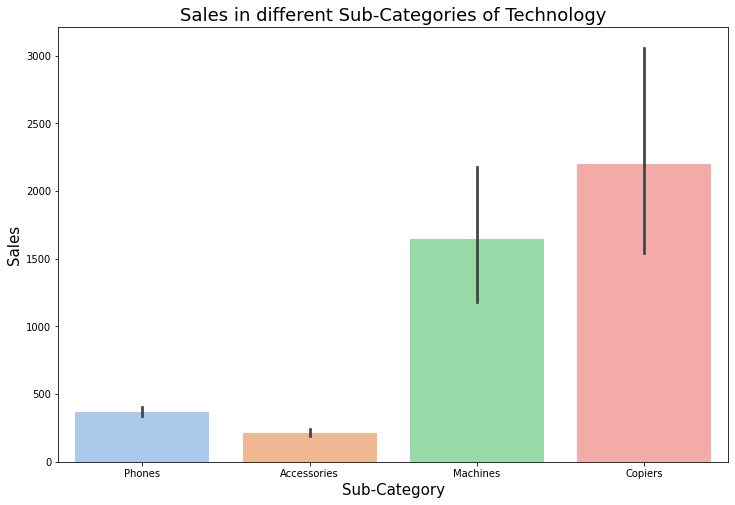

In [57]:
print('As in Category, the highest profit is in technology, so we will analyze all sub categories of Technology')
data2=data1[(data1['Category']=="Technology")]
plt.figure(figsize=[12,8])

sns.barplot(x="Sub-Category", y="Sales", data=data2, palette="pastel")
plt.title('Sales in different Sub-Categories of Technology', fontsize=18)
plt.xlabel("Sub-Category",fontsize=15)
plt.ylabel("Sales",fontsize=15)
plt.show()

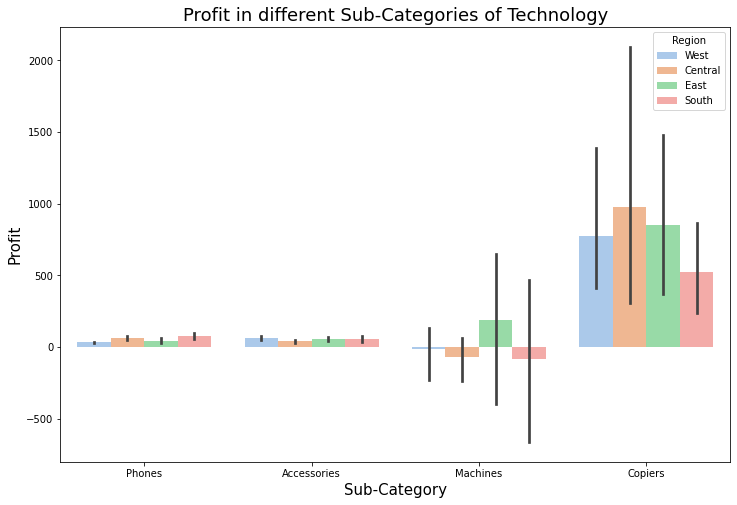

In [52]:
plt.figure(figsize=[12,8])
sns.barplot(x="Sub-Category", y="Profit",hue="Region", data=data2, palette="pastel")
plt.title('Profit in different Sub-Categories of Technology(Region wise)', fontsize=18)
plt.xlabel("Sub-Category",fontsize=15)
plt.ylabel("Profit",fontsize=15)
plt.show()

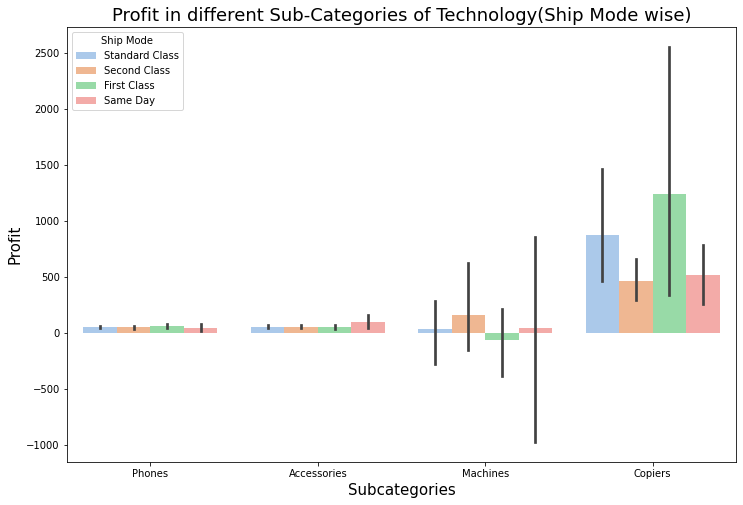

In [54]:
plt.figure(figsize=[12,8])
sns.barplot(x="Sub-Category", y="Profit",hue="Ship Mode", data=data2, palette="pastel")
plt.title('Profit in different Sub-Categories of Technology(Ship Mode wise)', fontsize=18)
plt.xlabel("Subcategories",fontsize=15)
plt.ylabel("Profit",fontsize=15)
plt.show()

Top 5 State profits under different Categories


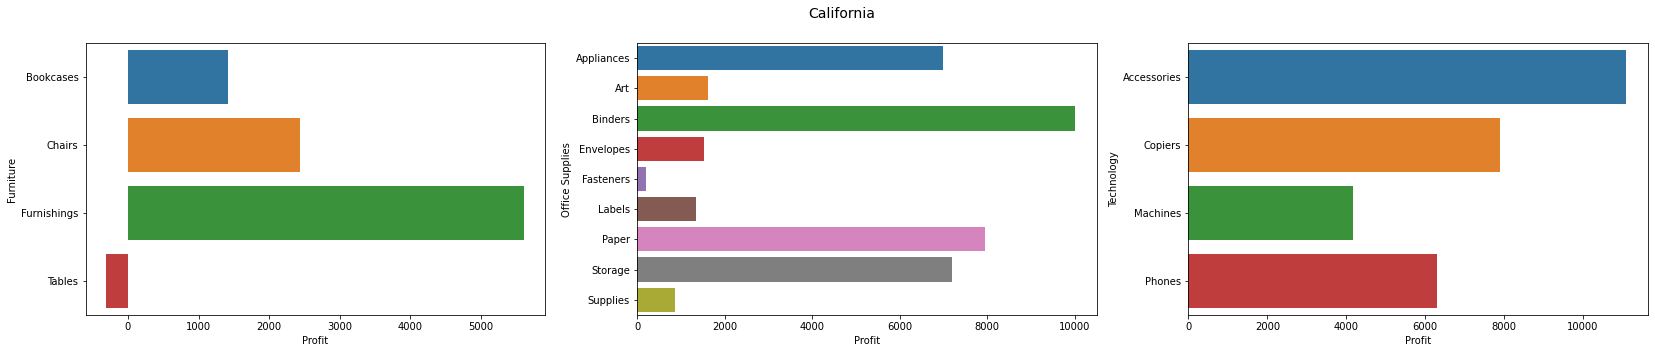

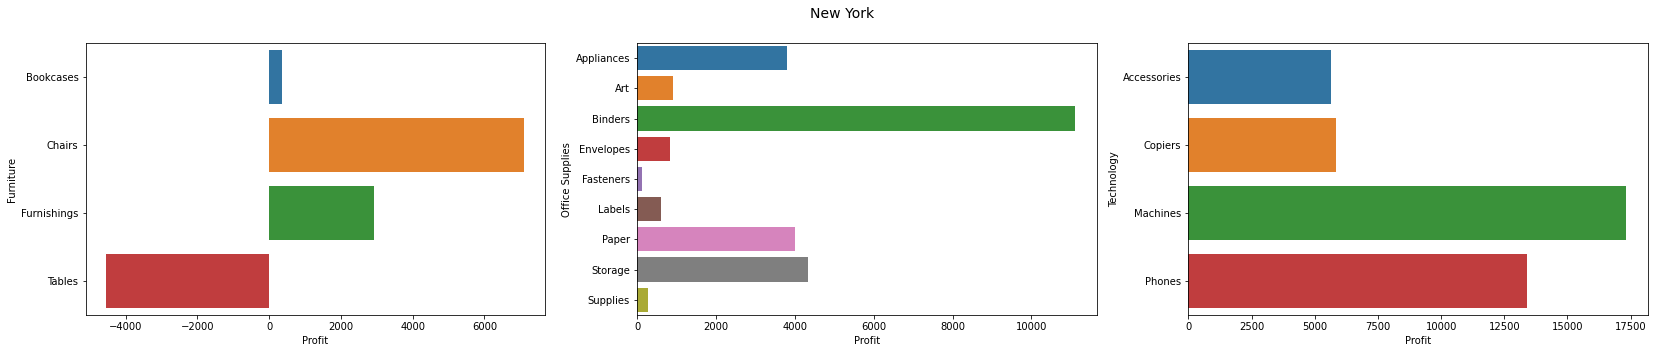

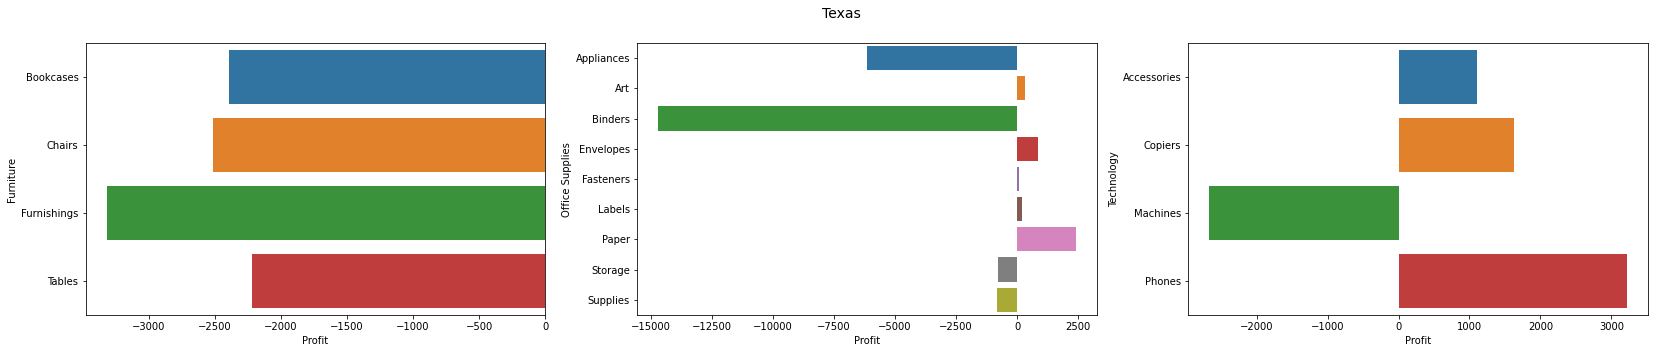

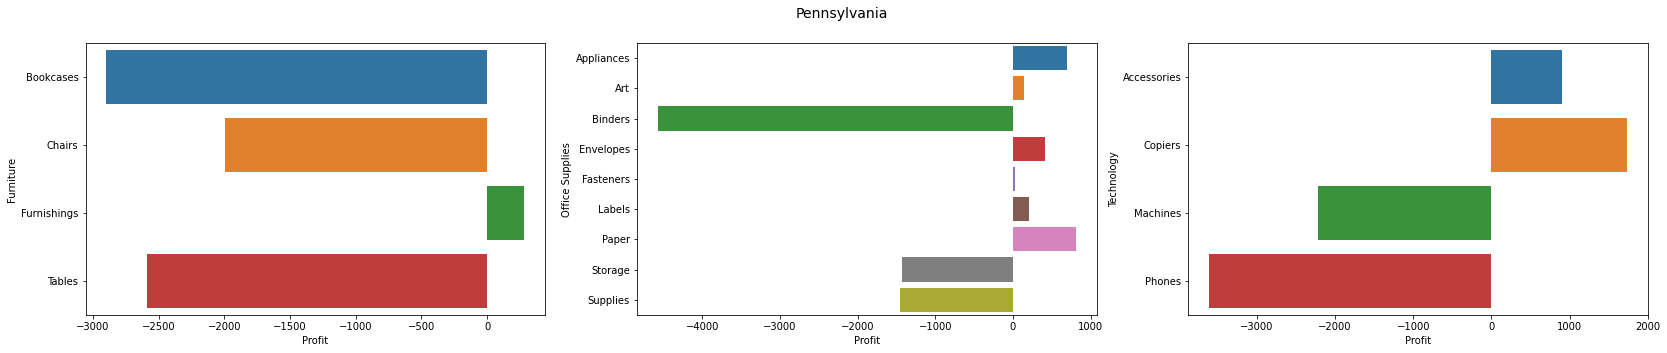

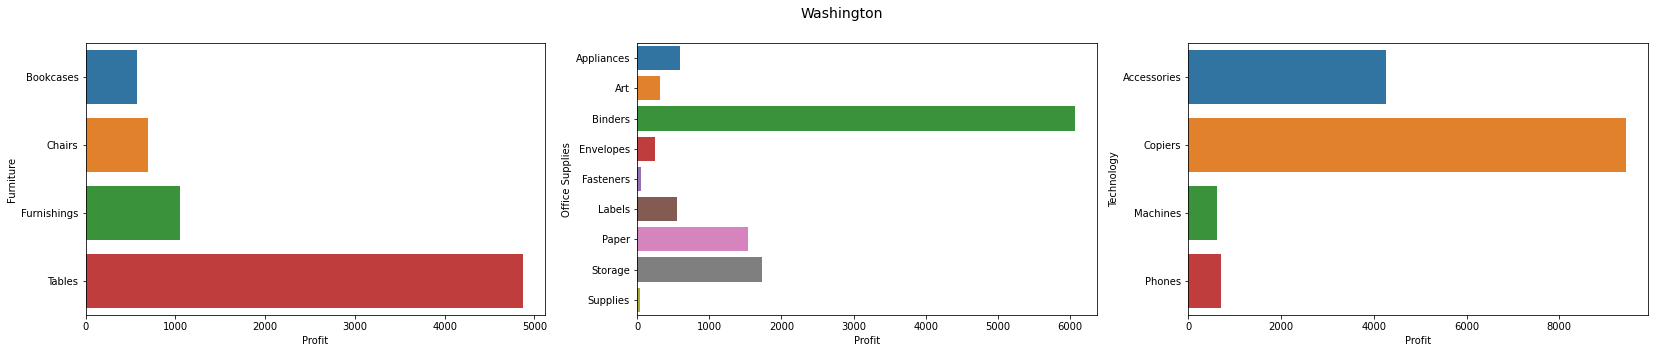

In [64]:
print('Top 5 State profits under different Categories')
states=['California','New York','Texas', 'Pennsylvania', 'Washington']
def state_data(state):
    state_wise_data=data1.groupby(['State'])
    for state in states:
        category_data=state_wise_data.get_group(state).groupby(['Category'])
        fig,axes =plt.subplots(1,3,figsize=(28,5))
        fig.suptitle(state,fontsize=14)
        ax_index=0
        for category in ['Furniture','Office Supplies','Technology']:
            sub_category_data=category_data.get_group(category).groupby(['Sub-Category']).sum()
            sns.barplot(x=sub_category_data.Profit,y=sub_category_data.index,ax=axes[ax_index])
            axes[ax_index].set_ylabel(category)
            ax_index +=1
        fig.show()
        

state_data(states)